In [1]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
import os
import glob
import tensorflow as tf
import numpy as np

In [3]:
layers = tf.keras.layers

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 12) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'

import matplotlib.gridspec as gridspec


In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
from tqdm import tqdm

In [7]:
tf.enable_eager_execution()

In [20]:
x = np.random.normal(size=(16,42))
y = tf.multiply(x,x)
y.numpy()

array([[  6.65388906e-03,   4.92680267e-05,   8.71793284e-03,
          4.10064575e-01,   2.82005239e+00,   8.91722694e-01,
          3.90331149e-01,   7.62122338e-02,   3.09487727e-03,
          3.08490238e-01,   8.16584763e-02,   1.34437900e-01,
          1.65641847e-01,   2.48890785e+00,   2.69881162e-02,
          9.41389843e-01,   1.94503956e+00,   5.78723983e-02,
          1.31318707e+00,   1.79599138e+00,   3.09374196e+00,
          2.40239672e+00,   3.46946373e-01,   5.09577727e+00,
          4.65150426e-01,   1.92873552e-02,   8.96044961e-01,
          5.76032950e-02,   1.63861278e-01,   1.44661652e+00,
          1.64036709e+00,   4.38310550e-03,   3.18863940e+00,
          8.20129826e-02,   1.41244493e+00,   2.15402333e-02,
          8.16792327e-01,   8.74055181e-02,   4.13920327e-01,
          1.53870217e+00,   5.08922266e-01,   4.56215198e-02],
       [  1.72316266e-02,   2.98828455e-01,   1.41220044e+00,
          6.37356452e-01,   2.22886621e-01,   4.40424673e+00,
       

In [35]:
with tf.GradientTape() as tape:
    x = tf.random_normal(shape=(16,42))
    z = tf.get_variable('z',shape=(16,42), trainable=True)
    tape.watch(x)
    y = x * z
    grad = tape.gradient(y, z)

In [36]:
grad

<tf.Tensor: id=106, shape=(16, 42), dtype=float32, numpy=
array([[ -9.24383759e-01,   4.40562606e-01,   1.61236382e+00,
          1.04547918e-01,   5.28470457e-01,   7.32266545e-01,
          1.43027067e+00,   1.82946301e+00,   1.41465163e+00,
         -2.97540486e-01,  -1.81659091e+00,   1.09872282e+00,
         -3.87646332e-02,   1.90459311e-01,   2.05168867e+00,
         -1.33573270e+00,   4.79942292e-01,   1.92144001e+00,
          1.04376340e+00,  -1.63806307e+00,   2.42368728e-01,
         -3.14023644e-01,  -5.66019416e-01,   4.70348209e-01,
          1.59400737e+00,   9.91289675e-01,  -1.60727775e+00,
         -1.25807688e-01,   6.63939536e-01,   1.13890743e+00,
          3.65120023e-01,   1.54699075e+00,   1.45347965e+00,
          1.43565238e+00,   1.08352757e+00,   7.06752360e-01,
         -8.70790184e-01,   3.69690865e-01,  -1.23608124e+00,
          1.80520177e+00,   3.17725182e-01,   1.00082850e+00],
       [ -8.46514761e-01,  -1.05413437e+00,   2.65524536e-01,
          1

In [37]:
def show_images(images):
    images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg]))
    return

In [63]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [64]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

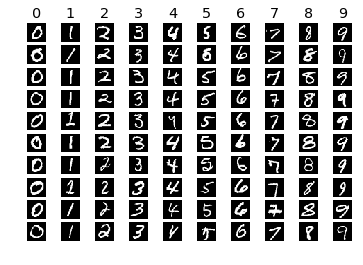

In [65]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 10
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [66]:
def build_discriminator():
    img_input = layers.Input(shape=(28, 28, 1))
    
    x = img_input
    
    x = layers.Conv2D(filters=32, kernel_size=(3,3), padding = 'same')(x)
    x = layers.ELU()(x)
    x = layers.MaxPool2D(pool_size=(2,2))(x)
    
    x = layers.Conv2D(filters=64, kernel_size=(3,3), padding = 'same')(x)
    x = layers.ELU()(x)    
    x = layers.MaxPool2D(pool_size=(2,2))(x)
    
    x = layers.Conv2D(filters=128, kernel_size=(3,3), padding = 'same')(x)    
    
    #Впишите код
    
    x = layers.Flatten()(x)
    x = layers.Dense(1)(x)
    
    return tf.keras.models.Model(img_input, x, 
                        name='discriminator')

In [67]:
discriminator = build_discriminator()

In [68]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
elu_3 (ELU)                  (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
elu_4 (ELU)                  (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
__________

In [69]:
x_train = np.expand_dims(((x_train -127.5) / 127.5), -1).astype(np.float32)

In [70]:
discriminator(x_train[:32])

<tf.Tensor: id=649, shape=(32, 1), dtype=float32, numpy=
array([[-0.17486349],
       [ 0.03753776],
       [-0.02304894],
       [-0.01187467],
       [-0.11194391],
       [-0.13509499],
       [-0.23689128],
       [-0.21655442],
       [-0.0817645 ],
       [ 0.05334148],
       [-0.26541585],
       [ 0.1658491 ],
       [-0.22977619],
       [-0.09845978],
       [-0.02594117],
       [-0.04975548],
       [-0.07609306],
       [-0.02632492],
       [-0.09741192],
       [-0.01437617],
       [-0.1105445 ],
       [ 0.00504231],
       [-0.02903232],
       [-0.03320508],
       [-0.15036409],
       [-0.11122429],
       [-0.1462605 ],
       [-0.25327501],
       [-0.33750933],
       [-0.02814677],
       [-0.21982308],
       [ 0.04003947]], dtype=float32)>

# А теперь генератор 

In [85]:
7*7*10

490

In [110]:
def build_generator():
    z_input = layers.Input(shape=(64,))
    
    #Впишите код
    
    x = z_input
    
    x = layers.Dense(7*7*128)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Reshape([7,7,128])(x)
    
    x = layers.Conv2D(filters=64, kernel_size=(3,3), padding = 'same')(x)
    x = layers.ELU()(x)
    x = layers.UpSampling2D()(x)
    print(x.shape)
    
    
    x = layers.Conv2D(filters=32, kernel_size=(3,3), padding = 'same')(x)
    x = layers.ELU()(x)
    x = layers.UpSampling2D()(x)
    print(x.shape)
    
#     x = layers.Conv2D(filters=64, kernel_size=(3,3), padding = 'same')(x)
#     x = layers.ELU()(x)    
#     x = layers.MaxPool2D(pool_size=(2,2))(x)
    
#     x = layers.Conv2D(filters=128, kernel_size=(3,3), padding = 'same')(x)  
    
    
    x = layers.Conv2D(1, (3, 3), padding='same', activation='tanh')(x)

    return tf.keras.models.Model(z_input, x)

In [111]:
generator = build_generator()

(?, 14, 14, 64)
(?, 28, 28, 32)


In [112]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 6272)              407680    
_________________________________________________________________
batch_normalization_4 (Batch (None, 6272)              25088     
_________________________________________________________________
reshape_6 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 7, 7, 64)          73792     
_________________________________________________________________
elu_15 (ELU)                 (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_9 (UpSampling2 (None, 14, 14, 64)        0         
__________

In [113]:
p = generator(np.random.normal(size=(1, 64)))

In [114]:
p.shape

TensorShape([Dimension(1), Dimension(28), Dimension(28), Dimension(1)])

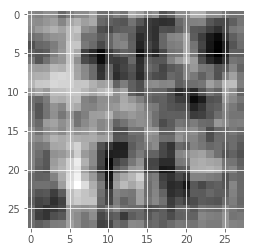

In [115]:
plt.imshow(p[0, :, :, 0])

# Зададим функции потерь

In [116]:
def get_generator_loss(noise_vector):
    fake_images = generator(noise_vector, training=True)
    logits = discriminator(fake_images, training=False)
    return tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=tf.ones(shape=logits.shape))

In [117]:
get_generator_loss(np.random.normal(size=(1, 64)))

<tf.Tensor: id=2860758, shape=(1, 1), dtype=float32, numpy=array([[ 6.30071735]], dtype=float32)>

In [118]:
def get_disc_loss(real_images, noise_vector):
    fake_images = generator(noise_vector, training=False)
    logits_fake = discriminator(fake_images, training=True)
    logits_real = discriminator(real_images, training=True)
    logits = tf.concat([logits_real, logits_fake], 0)
    labels = tf.concat([tf.ones(shape=logits_real.shape), tf.zeros(shape=logits_fake.shape)], 0)
    return tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=labels)

In [119]:
get_disc_loss(x_train[0:1], np.random.normal(size=(1,64)))

<tf.Tensor: id=2860886, shape=(2, 1), dtype=float32, numpy=
array([[ 0.55856651],
       [ 0.00125163]], dtype=float32)>

# Training loop


In [120]:
lr = 0.0001
lr_g = 0.0001

In [121]:
gen_otimizer = tf.train.AdamOptimizer(lr_g, beta1=0.5, beta2=0.999)
crit_optimizer = tf.train.AdamOptimizer(lr, beta1=0.5, beta2=0.999)

In [122]:
def apply_grads(optimizer, grads, variables):
    optimizer.apply_gradients(zip(grads, variables),
                            global_step=tf.train.get_or_create_global_step())

In [123]:
def train_your_gan(batch_size=16, epochs=20):
    index = np.arange(len(x_train))

    #перемешиваем его
    np.random.shuffle(index)

    #разбиваем на батчи
    num_batches = int(len(index) / batch_size)
    batch_indexes = np.array_split(index, num_batches)

    print("num_batches: " + str(num_batches))
    
    for e in range(epochs):
        g_loss_history = []
        d_loss_history = []
        for i, batch_index in enumerate(batch_indexes):
            x_batch = x_train[batch_index]
            
            with tf.GradientTape() as tape:
                d_loss = get_disc_loss(x_batch, np.random.normal(size=(batch_size,64)))
                d_grads = tape.gradient(d_loss, discriminator.variables)
                apply_grads(crit_optimizer, d_grads, discriminator.variables)

            with tf.GradientTape() as tape:
                g_loss = get_generator_loss(np.random.normal(size=(batch_size, 64)))
                g_grads = tape.gradient(g_loss, generator.variables)
                apply_grads(gen_otimizer, g_grads, generator.variables)
            print(f'epoch {e}, batch {i} / {num_batches}', end='\r')
            g_loss_history.append(g_loss.numpy())
            d_loss_history.append(d_loss.numpy())

        print(f'epoch {e}, generator_loss: {np.mean(g_loss_history)}, critic_loss: {np.mean(d_loss_history)}')
        images = generator(np.random.normal(size=(batch_size, 64)))
        show_images(images)
        plt.show()

num_batches: 3750
epoch 0, generator_loss: 0.7837492227554321, critic_loss: 0.6380436420440674


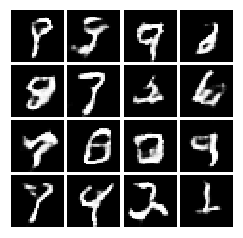

KeyboardInterrupt: 

In [106]:
train_your_gan()

num_batches: 3750
epoch 0, generator_loss: 2.0120341777801514, critic_loss: 0.29999446868896484


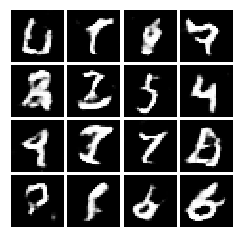

KeyboardInterrupt: 

In [124]:
train_your_gan()